# Summer Program: Python Programming \_ Day2 Quiz

김보람  
2023-07-25

#### —

title: “Summer Program: Python Programming \_ Day2 Quiz” author:
“김보람” date: “07/25/2023”

------------------------------------------------------------------------

# lesson 7

In [355]:
import pandas as pd

### 1

In [354]:
from IPython.core.display import HTML 
HTML('<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>A</th>\n      <th>B</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1</td>\n      <td>-2</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2</td>\n      <td>-3</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>3</td>\n      <td>-4</td>\n    </tr>\n  </tbody>\n</table>')

In [357]:
df = pd.DataFrame({'A':[1,2,3],'B':[-2,-3,-4]})
df

### 2

In [359]:
df.columns = ['X1','X2']
df

### 3

In [360]:
df = pd.DataFrame(np.random.normal(size=(100,5)),columns=list('ABCDE'))
df

In [363]:
df[['B','D']]

### 4

In [366]:
df[-10:]

### 5

In [368]:
df[['A','B']][:10]

In [369]:
df.loc[:,['A','B']].iloc[:10]

### 6

In [370]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/movie.csv')
df

In [371]:
len(df.columns)

### 7

In [373]:
index = df.columns
index

In [376]:
[l for l in index if l[0]=='c' or l[0]=='d']

In [377]:
len([l for l in index if l[0]=='c' or l[0]=='d'])

### 8

In [378]:
[l for l in df.columns if 'actor' in l]

In [379]:
len([l for l in df.columns if 'actor' in l])

### 9

In [380]:
df.loc[:, ['actor' in l for l in df.columns]]

# lesson 9

In [381]:
np.random.seed(20230426)
day = ['2023-04-24(Mon)','2023-04-25(Tue)','2023-04-26(Wed)','2023-04-27(Thu)','2023-04-28(Fri)',
       '2023-05-01(Mon)','2023-05-02(Tue)','2023-05-03(Wed)','2023-05-04(Thu)','2023-05-05(Fri)',
       '2023-05-08(Mon)','2023-05-09(Tue)','2023-05-10(Wed)','2023-05-11(Thu)','2023-05-12(Fri)']
hours1 = np.random.randn(15).cumsum()*2
hours1 = hours1 - hours1.min() +1
hours2 = np.random.randn(15).cumsum()*2
hours2 = hours2 - hours2.min() +1

df = pd.DataFrame({'hours(R)':hours1, 'hours(Python)':hours2},index=day)
df

### 1

In [384]:
index = [l.replace(')','').split('(') for l in df.index]

In [385]:
index

In [387]:
df.assign(day = [day for day, _ in index], weekday = [weekday for _, weekday in index])


In [391]:
df = df.assign(day = [day for day, _ in index], weekday = [weekday for _, weekday in index]).reset_index().loc[:,'hours(R)':]
df

### 2

In [395]:
df.query('day < "2023-05-01"')['hours(R)'].sum()

In [396]:
df.query('day < "2023-05-01"')['hours(Python)'].sum()

-   python

### 3

In [397]:
{s:df.loc[df.weekday == s, 'hours(R)'].sum() for s in set(df.weekday)}

### 4

In [401]:
{s:df.loc[df.weekday == s, 'hours(R)'].sum() for s in set(df.weekday)}

In [400]:
{s:df.loc[df.weekday == s, 'hours(Python)'].sum() for s in set(df.weekday)}

In [402]:
{s:df.loc[df.weekday == s,'hours(R)',].sum()+df.loc[df.weekday == s,'hours(Python)'].sum() for s in set(df.weekday)}

### 5

In [410]:
import matplotlib.pyplot as plt

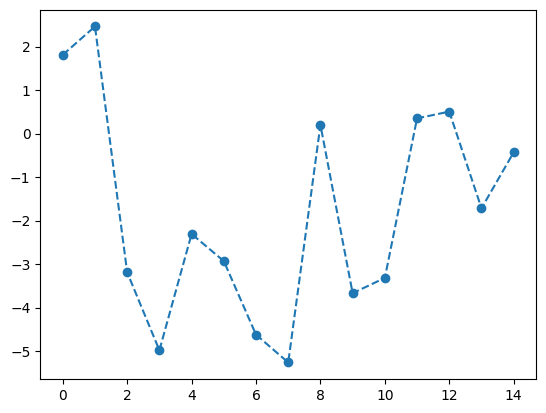

In [411]:
y = df['hours(R)'] - df['hours(Python)']
plt.plot(y,'--o')

# lesson 10

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
df.head(n=3)

### 1

In [47]:
df.Position

In [27]:
df.loc[:,'Position']

In [12]:
s = df["Position"]
s

### 2

In [24]:
s = s.dropna()
s

### 3

In [14]:
position_dict = {
    'GOALKEEPER':['GK'],
    'DEFENDER':['CB','RCB','LCB','RB','LB','RWB','LWB'],
    'MIDFIELDER':['CM','RCM','LCM','CDM','RDM','LDM','CAM','RAM','LAM','RM','LM'],
    'FORWARD':['ST','CF','RF','LF','RW','LW','RS','LS'],
    'SUB':['SUB'],
    'RES':['RES']
}

In [56]:
lst = list(map(lambda x: x.split('>')[-1],s))

In [58]:
s.apply(lambda x: x.split('>')[-1])

In [65]:
[(k,v) for k,v in position_dict.items()]

In [68]:
[k for l in s.apply(lambda x: x.split('>')[-1]) for k,v in  position_dict.items() if l in v]

In [46]:
# list(map(lambda l : [k for l in s for k,v in position_dict.items() if l in v],s))

### 4

In [66]:
df.Age

In [69]:
df.Age.mean()

In [71]:
list(map(lambda x: 'OB' if x>df.Age.mean() else 'YB', df.Age))

or

In [ ]:
df.Age.apply(

### 5

BMI = 키 / 몸무게^2

In [ ]:
df.Height.apply( x[:-2])

In [74]:
df.Height

In [75]:
df.Weight

In [82]:
_df = df.loc[:,'Height':'Weight'].applymap(lambda x: int(x[:-2])).eval('BMI=Height/Weight**2')
_df

### 6

In [83]:
_df.BMI.mean()

In [84]:
list(map(lambda x: 'H' if x>_df.BMI.mean() else 'L', _df.BMI))

In [85]:
_df.BMI.apply(lambda x: 'H' if x>_df.BMI.mean() else 'L')

# lesson 11

## lesson

In [101]:
_category = ['A']*5+['B']*5
_value = np.concatenate([np.random.randn(5), np.random.randn(5)+10])
df = pd.DataFrame({'category':_category, 'value':_value})
df

In [102]:
df.groupby("category").mean()

In [103]:
df.groupby("category").aggregate(np.mean)

### flights data

In [118]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      58492 non-null  int64  
 1   DAY        58492 non-null  int64  
 2   WEEKDAY    58492 non-null  int64  
 3   AIRLINE    58492 non-null  object 
 4   ORG_AIR    58492 non-null  object 
 5   DEST_AIR   58492 non-null  object 
 6   SCHED_DEP  58492 non-null  int64  
 7   DEP_DELAY  57659 non-null  float64
 8   AIR_TIME   57474 non-null  float64
 9   DIST       58492 non-null  int64  
 10  SCHED_ARR  58492 non-null  int64  
 11  ARR_DELAY  57474 non-null  float64
 12  DIVERTED   58492 non-null  int64  
 13  CANCELLED  58492 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 6.2+ MB

`-` 예제1: 항공사(AIRLINE)별로 도착지연시간의(ARR_DELAY)의 평균을
구하라.

In [120]:
df.groupby("AIRLINE")["ARR_DELAY"].mean()

In [124]:
df.groupby("AIRLINE").aggregate({'ARR_DELAY':[np.mean,'count']})

`-` 예제2: 항공사(AIRLINE)별로 비행취소건수(CANCELLED)의 합계를 구하라.
취소건수가 가장 높은 두개의 항공사는 어디인가?

In [137]:
df.groupby("AIRLINE").aggregate({'CANCELLED':'sum'}).sort_values(by="CANCELLED", ascending=False)

`-` 예제3: 항공사(AIRLINE)별로 비행취소율(CANCELLED)을 구하라.
비행취소율이 가장 높은 두개의 항공사는 어디인가?

In [139]:
df.groupby("AIRLINE").aggregate({'CANCELLED':'mean'}).sort_values(by="CANCELLED", ascending=False)

`-` 예제5: 아래는 운행거리의 요약통계량이다. 운행거리를 구간별로
`[-np.inf,391,690,1199,np.inf]`와 같이 나눈뒤 비행취소건수와 취소율을
구하여라.

In [141]:
df.DIST.describe()

In [142]:
_bin = [-np.inf,391,690,1199,np.inf]

In [147]:
df.assign(DIST2 = pd.cut(df.DIST,_bin)).groupby('DIST2').agg('mean')

## Quiz

In [149]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/HRDataset_v14.csv')
df

### 1

In [163]:
df.groupby(by='RaceDesc').agg({'EmpID':'count'})

### 2

’RaceDesc==White’의 성별(Sex)임금차이는 2000이상이다.

In [170]:
df.groupby(by=['RaceDesc','Sex']).agg({'Salary':'mean'})

### 3

퇴직한사람(Termd==1)은 모두 104명이며 백인여성의 퇴직자수가 가장 많다.

In [153]:
(df.Termd==1).sum()

In [169]:
df.groupby(['RaceDesc','Sex']).agg({'Termd':'sum'})

### 4

퇴직한사람중 아시아인의 비율은 10%가 넘지 않는다.

In [168]:
df.groupby(by=['RaceDesc']).agg({'Termd':'sum'})

In [156]:
9/104

### 5

\[성별(Sex), 결혼유무(MarriedID)\] 별 연봉(Salary)의 평균을 조사하라.
어떠한 그룹이 가장 평균연봉이 적은가?

In [167]:
df.groupby(['Sex','MarriedID']).agg({'Salary':'mean'})

### 6

\[성별(Sex), 인종별(RaceDesc)\] 별 연봉(Salary)의 중앙값(‘median’)을
조사하라. 연봉의 중앙값이 가장 높은 그룹은 무엇인가?

In [166]:
df.groupby(['Sex','RaceDesc']).agg({'Salary':'median'})

### 7

\[성별(Sex), 인종별(RaceDesc)\] 별 연봉(Salary)의 중앙값(‘median’)과
근무인원수를 함께 조사하라. 연봉의 중앙값이 가장 높은 그룹이 혜택을 받는
그룹이라고 느껴지는가?

In [159]:
df.groupby(['Sex','RaceDesc']).agg({'Salary':['median','count']})

------------------------------------------------------------------------

jupyter: kernelspec: display_name: Python 3 (ipykernel) language: python
name: python3 language_info: codemirror_mode: name: ipython version: 3
file_extension: .py mimetype: text/x-python name: python
nbconvert_exporter: python pygments_lexer: ipython3 version: 3.8.16

------------------------------------------------------------------------